In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('spot.png', cv2.IMREAD_GRAYSCALE) # считываем картинку
cv2.imshow('spot', img) # выводим на экран
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
print("Высота:"+str(img.shape[0]))
print("Ширина:" + str(img.shape[1]))

Высота:308
Ширина:301


Центральные направления

In [5]:
center_line = int(img.shape[0]) // 2 # центральная строка
center_column = int(img.shape[1]) // 2 # центральный столбец

### Эксперимент с горизонтальным направлением
Рассмотрим отдельно центральную строку изображения. Выведем ее значения, затем вычислим градиент и убедимся на графиках, что рисутствуют 2 пика.

In [6]:
s = np.array(list(map(int, img[center_line]))) 
print(s)

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 255 255 255 25

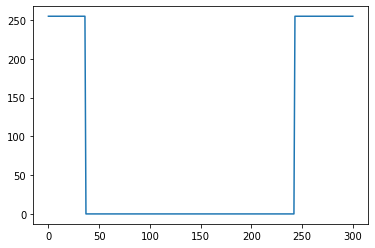

In [7]:
x = np.arange(img.shape[1]) # размер строки
y = s
plt.figure()
plt.plot(x, y)
plt.show()

Строим градиент и видим 2 пика

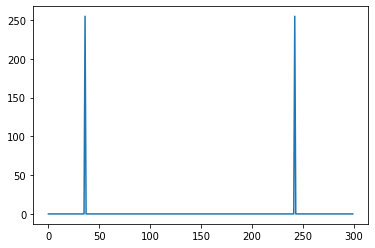

In [8]:
grad = np.zeros(img.shape[1] - 1)
for i in range(img.shape[1] - 1):
    grad[i] = abs(y[i+1] - y[i])
plt.figure()
plt.plot(x[:img.shape[1] - 1], grad)
plt.show()

### Теперь с наклонным напралением
Усложним задачу: выделим направление, отобразим его на картинке, вычислим градиент и найдем его экстремумы.
Идея построения направления: переносим начало координат в центр изображения и строим его сначала вправо от центра, потом влево.

In [9]:
res_1 = cv2.imread('spot.png', cv2.IMREAD_COLOR) # здесь будет результат

bright = np.zeros(img.shape[1]) # массив для значений яркости
bright.fill(255)

alpha = math.pi / 3  # угол направления с горизонталью
k = math.tan(alpha)

coordinates = np.zeros(img.shape[1]) # номера строк соотв-е номерам столбцов для направления
# проход вправо
x = center_column
y = center_line
while y > 0 and x < img.shape[1]:
    bright[int(x)] = img[math.ceil(y), x]
    coordinates[x] = math.ceil(y)
    res_1[math.ceil(y), int(x)] = 220 
    x += 1
    y -= k
# проход влево
x = int(center_column)
y = int(center_line)
while y < img.shape[0] and x > 0:
    bright[x] = img[math.floor(y), x]
    coordinates[x] = math.floor(y)
    res_1[math.floor(y), x] = 220 
    x -= 1
    y += k

grad = np.zeros(img.shape[1] - 1)
for i in range(img.shape[1] - 1):
    grad[i] = abs(bright[i+1] - bright[i])  
    
# проход по первой половине массива
max_bright = 0
index = 0
for i in range(int(center_column)):
    if grad[i] > max_bright:
        max_bright = grad[i]
        index = i + 1
res_1[int(coordinates[index]), index] = (0, 0, 255)

# проход по второй половине массива
max_bright = 0
index = 0
for i in range(img.shape[1] - 2, center_column, -1):
    if grad[i] > max_bright:
        max_bright = grad[i]
        index = i
res_1[int(coordinates[index]), index] = (0, 0, 255)

cv2.imshow('result', res_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Общий случай
Сначала задаем кол-во направлений, затем вычисляем по ним градиенты яркости как в предыдущем примере и отмечаем точки пиков на изображении. Потом соединяем полученные точки и имеем примерные границы пятна.

Text(0.5, 1.0, "<class 'numpy.ndarray'>")

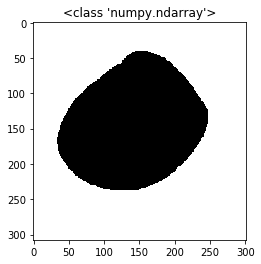

In [10]:
image = plt.imread('spot.png')
fig, ax = plt.subplots()
ax.imshow(image)
ax.set_title(type(image))

In [19]:
res = cv2.imread('spot.png', cv2.IMREAD_COLOR) # здесь будет сегментрованное изображение
n = int(input()) # кол-во прямых-направлений
lines = 100
for i in range(n):
    bright = np.zeros(img.shape[1]) # массив для значений яркости
    vertical_bright = np.zeros(img.shape[0]) # отдельно для вертикального направления
    bright.fill(255)
    alpha = i * math.pi / n # угол между соседними направлениями
    k = math.tan(alpha)
    coordinates = np.zeros(img.shape[1]) # номера строк соотв-е номерам столбцов для направления
    
    if i == 0: # случай горизонтального направления
        bright = np.array(list(map(int, img[center_line])))
        coordinates.fill(center_line)
        #res[center_line] = lines
        
    elif i == n / 2: # случай вертикального направления
        vertical_bright = np.array(list(map(int, img[:,center_column])))
        coordinates = np.arange(img.shape[1])
        #res[:,center_column] = lines
        
    elif i < n / 2:           # 1 и 3 четвери
        x = center_column
        y = center_line
        while y > 0 and x < img.shape[1]:
            bright[int(x)] = img[int(y), x]
            coordinates[x] = int(y)
            #res[math.ceil(y), int(x)] = lines
            x += 1
            y -= k
        x = center_column
        y = center_line
        while y < img.shape[0] and x > 0:
            bright[x] = img[int(y), x]
            coordinates[x] = int(y)
            #res[math.floor(y), int(x)] = lines
            x -= 1
            y += k
            
    elif i > n / 2 and i < n:           # 2 и 4 четверти
        x = center_column
        y = center_line
        while y > 0 and x > 0:
            bright[x] = img[int(y), x]
            coordinates[x] = int(y)
            #res[math.floor(y), int(x)] = lines
            x -= 1
            y += k
        x = center_column
        y = center_line
        while y < img.shape[0] and x < img.shape[1]:
            bright[x] = img[int(y), x]
            coordinates[x] = int(y)
            #res[math.ceil(y), int(x)] = lines
            x += 1
            y -= k
    
    if i != n / 2:
        grad = np.zeros(img.shape[1] - 1)
        for i in range(img.shape[1] - 1):
            grad[i] = abs(bright[i+1] - bright[i])
        
        # идем с начала массива и находим максимум
        first = 0
        max_grad = 0
        for i in range(int(center_column)):
            if grad[i] > max_grad:
                max_grad = grad[i]
                first = i
            
        # идем с конца массиваи
        last = img.shape[1] - 2
        max_grad = 0
        for i in range(img.shape[1] - 2, int(center_column), -1):
            if grad[i] > max_grad:
                max_grad = grad[i]
                last = i
    #print(grad)
    
        #res[coordinates.astype(int)[first], first] = (0, 0, 255)
        #res[coordinates.astype(int)[last], last] = (0, 0, 255)

        cv2.circle(res, (first, coordinates.astype(int)[first]), radius=1, color=(0, 0, 255), thickness=-1)
        cv2.circle(res, (last, coordinates.astype(int)[last]), radius=1, color=(0, 0, 255), thickness=-1)
    
    if i == n / 2:
        grad = np.zeros(img.shape[0] - 1)
        for i in range(img.shape[0] - 1):
            grad[i] = abs(vertical_bright[i+1] - vertical_bright[i])
            
        # идем с начала массива и находим максимум
        first = 0
        max_grad = 0
        for i in range(int(center_line)):
            if grad[i] > max_grad:
                max_grad = grad[i]
                first = i
            
        # идем с конца массиваи
        last = img.shape[0] - 2
        max_grad = 0
        for i in range(img.shape[0] - 2, int(center_line), -1):
            if grad[i] > max_grad:
                max_grad = grad[i]
                last = i
        
        #res[first, center_column] = (0, 0, 255)
        #res[last, center_column] = (0, 0, 255)
        
        cv2.circle(res, (center_column, first), radius=1, color=(0, 0, 255), thickness=-1)
        cv2.circle(res, (center_column, last), radius=1, color=(0, 0, 255), thickness=-1)
        

cv2.imshow('result', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

30


### Теперь попробуем сделать то же самое, но с применением Sobel фильтра

In [29]:
s_grad = cv2.Sobel(img, cv2.CV_32F, 1, 1, 5)
cv2.imshow('s_grad', s_grad)
cv2.waitKey(0)
cv2.destroyAllWindows()